<center><h1>Final Project</h1></center>

# Introduction

<p>Strokes are a major global health concern, leading to substantial morbidity and mortality. Predicting stroke risk based on demographic and health-related factors can be crucial for early intervention and preventive strategies. Our project aims to analyze and predict stroke occurrences using a dataset available from Kaggle, specifically the "Stroke Prediction Dataset" compiled by Fedesoriano.</p>

<p>The dataset features numerous health indicators and lifestyle factors:</p>
<ul>
    <li><strong>Age:</strong> Continuous variable indicating the age of the patients.</li>
    <li><strong>Hypertension:</strong> Binary variable indicating if the patient has hypertension.</li>
    <li><strong>Heart Disease:</strong> Binary variable showing if the patient has any heart-related diseases.</li>
    <li><strong>Marital Status:</strong> Categorical variable indicating marital status.</li>
    <li><strong>Work Type:</strong> Categorical variable indicating the type of occupation.</li>
    <li><strong>Residence Type:</strong> Categorical variable differentiating between rural and urban residence.</li>
    <li><strong>Average Glucose Level:</strong> Continuous variable showing the average glucose level in blood.</li>
    <li><strong>BMI:</strong> Continuous variable indicating the Body Mass Index.</li>
    <li><strong>Smoking Status:</strong> Categorical variable indicating the smoking status.</li>
    <li><strong>Stroke:</strong> Binary target variable indicating if the patient had a stroke.</li>
</ul>

<p>This dataset is ideal for uncovering patterns and predictors of stroke risk through detailed data analysis and visualization.</p>


## Importing Necessary Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [149]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Exploratory Data Analysis & Data Preprocessing

In [150]:
stroke_data.shape

(5110, 12)

In [151]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset seems well-structured with a mix of numerical and categorical variables. However, there are missing values in the bmi column (201 missing values).

### Handeling Missing Values

We will proceed by examining the distribution of the BMI values to decide on the best method for imputation (whether to use the mean or median). This decision is typically based on the distribution's shape—whether it's skewed or symmetrical. We plot a histogram of the BMI values to visualize the distribution and calculate descriptive statistics to further guide the imputation method.

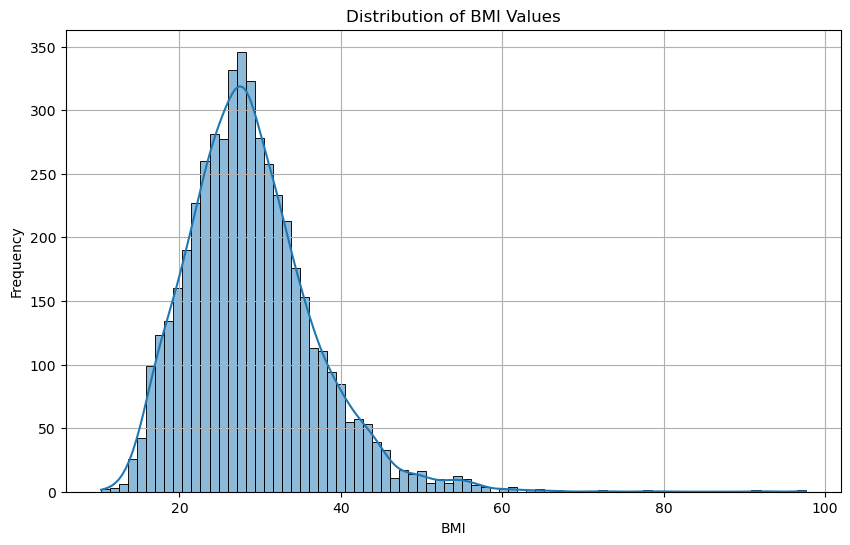

(None,
 count    4909.000000
 mean       28.893237
 std         7.854067
 min        10.300000
 25%        23.500000
 50%        28.100000
 75%        33.100000
 max        97.600000
 Name: bmi, dtype: float64)

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(stroke_data['bmi'].dropna(), kde=True)
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)


bmi_statistics = stroke_data['bmi'].describe()

plt.show(), bmi_statistics

The distribution of BMI values is somewhat right-skewed, as indicated by the histogram and the difference between the mean (approximately 28.89) and the median (28.10). The standard deviation is 7.85, and the range spans from a minimum of 10.3 to a maximum of 97.6, showing significant variability.

We will continue by replacing the missing values in <i>'bmi'</i> with the median.

In [153]:
# replace missing bmi with median
stroke_data['bmi'] = stroke_data['bmi'].fillna(stroke_data['bmi'].median())

print(stroke_data['bmi'].isna().sum())

0


Missing Values in 'bmi' have been imputed.

### Analyzing the predictors further

In [154]:
unique_values = pd.DataFrame(stroke_data.nunique(), columns=['Unique Values'])
unique_values

,Unique Values
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


<ol>
    <li><strong>id (5110 Unique Values):</strong> This indicates that there are 5110 unique patient IDs in the dataset, suggesting that each entry corresponds to a different individual.</li>
    <li><strong>gender (3 Unique Values):</strong> There are three unique entries under gender, which typically would include male, female, and possibly a non-binary or unspecified option.</li>
    <li><strong>age (104 Unique Values):</strong> There are 104 unique age values, indicating a diverse range of ages among the participants in the dataset.</li>
    <li><strong>hypertension (2 Unique Values):</strong> This binary variable indicates whether an individual has hypertension (1) or not (0).</li>
    <li><strong>heart_disease (2 Unique Values):</strong> Similar to hypertension, this is a binary variable indicating the presence (1) or absence (0) of heart disease.</li>
    <li><strong>ever_married (2 Unique Values):</strong> This binary variable reflects marital status, typically coded as yes (1) or no (0).</li>
    <li><strong>work_type (5 Unique Values):</strong> Reflects the type of employment or occupation of the individuals, with five distinct categories (e.g., private, self-employed, government job, children, never worked).</li>
    <li><strong>Residence_type (2 Unique Values):</strong> Indicates whether individuals live in urban (1) or rural (0) areas.</li>
    <li><strong>avg_glucose_level (3979 Unique Values):</strong> Reflects the wide variation in average glucose levels measured in the participants, with 3979 unique measurements.</li>
    <li><strong>bmi (418 Unique Values):</strong> Body Mass Index (BMI) also shows a wide range of values, with 418 unique measurements, indicating diverse body compositions.</li>
    <li><strong>smoking_status (4 Unique Values):</strong> Indicates smoking behavior with four categories, which might include current smoker, former smoker, never smoked, and unknown.</li>
    <li><strong>stroke (2 Unique Values):</strong> This binary variable indicates whether the individual has had a stroke (1) or not (0).</li>
</ol>


In [155]:
stroke_data["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [156]:
stroke_data = stroke_data[stroke_data["gender"] != "Other"]

## Research Questions

### a) What is the distribution of the predictive physical health factors and demographic factors such as hypertension, health stroke, BMI, and glucose levels etc among individuals in the dataset?

#### Distribution of Numerical Predictors

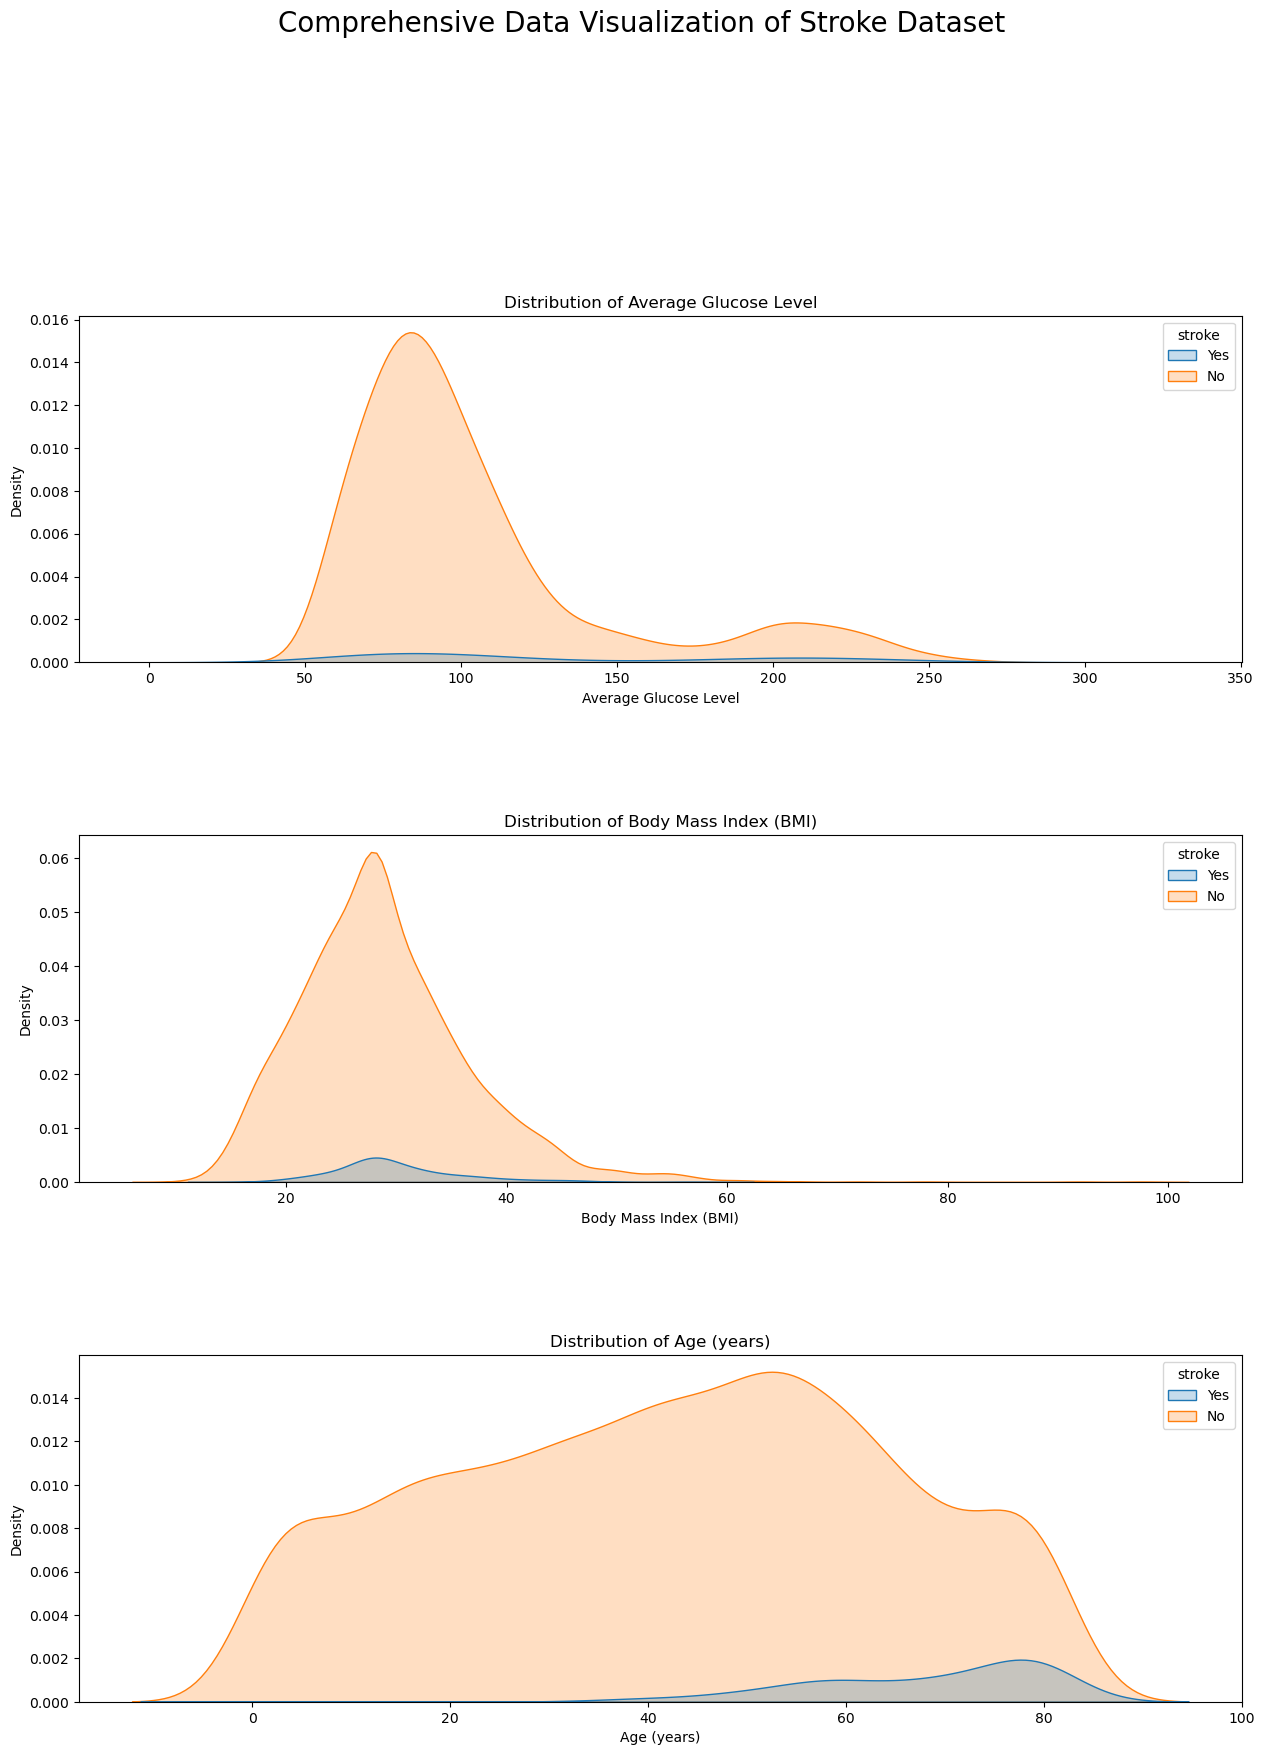

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 1, figsize=(15, 18))  

columns = ['avg_glucose_level', 'bmi', 'age']
nice_labels = {
    'avg_glucose_level': 'Average Glucose Level',
    'bmi': 'Body Mass Index (BMI)',
    'age': 'Age (years)'
}

for i, col in enumerate(columns):
    current_ax = ax[i] 
    plot = sns.kdeplot(data=stroke_data_mod, x=col, hue='stroke', ax=current_ax, fill=True)
    title = nice_labels[col] if col in nice_labels else col.replace('_', ' ').title()
    plot.set_title(f'Distribution of {title}')
    plot.set_xlabel(title)
    plot.set_ylabel('Density')

plt.suptitle('Comprehensive Data Visualization of Stroke Dataset', fontsize=20, y=1.05)
plt.subplots_adjust(hspace=0.5)  
plt.show()


### Distribution of Categorical Predictors

**Gender**

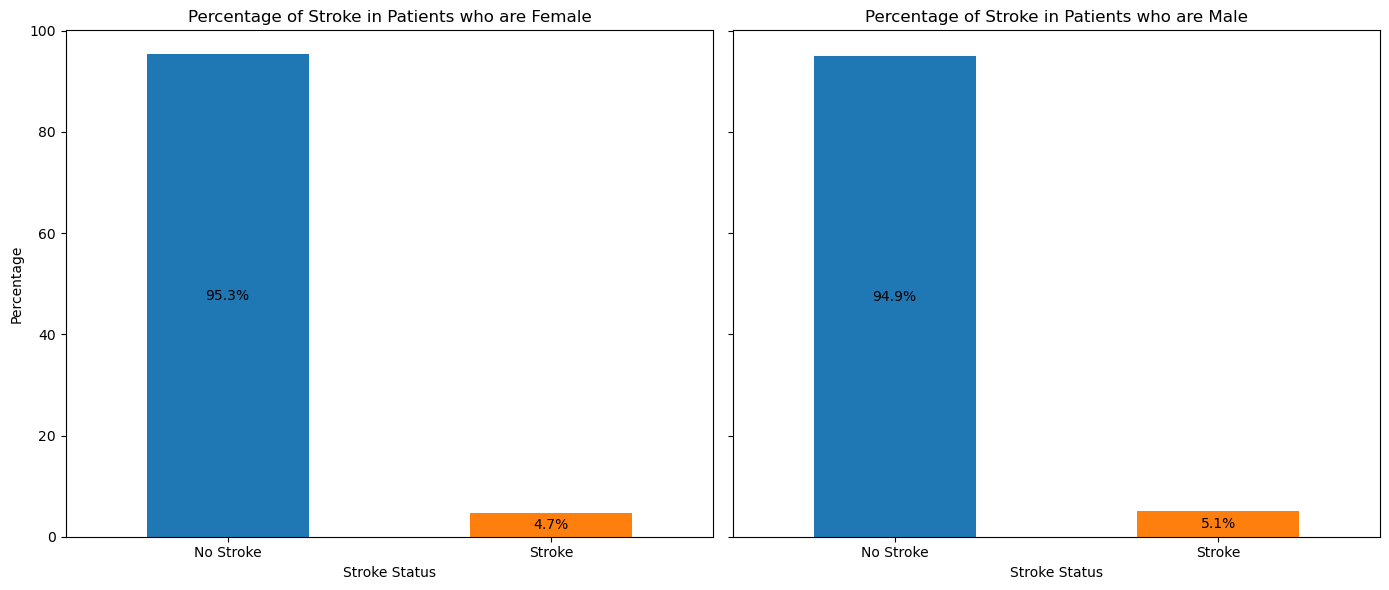

In [158]:
grouped_gender = stroke_data.groupby('gender')['stroke'].value_counts(normalize=True).unstack() * 100
grouped_gender = grouped_gender.fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

titles_gender = ['Female', 'Male']

for i, ax in enumerate(axes):
    grouped_plot = grouped_gender.iloc[i].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)
    ax.set_title(f'Percentage of Stroke in Patients who are {titles_gender[i]}')
    ax.set_xlabel('Stroke Status')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(['No Stroke', 'Stroke'], rotation=0)

    for p in grouped_plot.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:  
            ax.text(x + width / 2,
                    y + height / 2,
                    f'{height:.1f}%',
                    horizontalalignment='center',
                    verticalalignment='center')

plt.tight_layout()
plt.show()


**Hypertension**

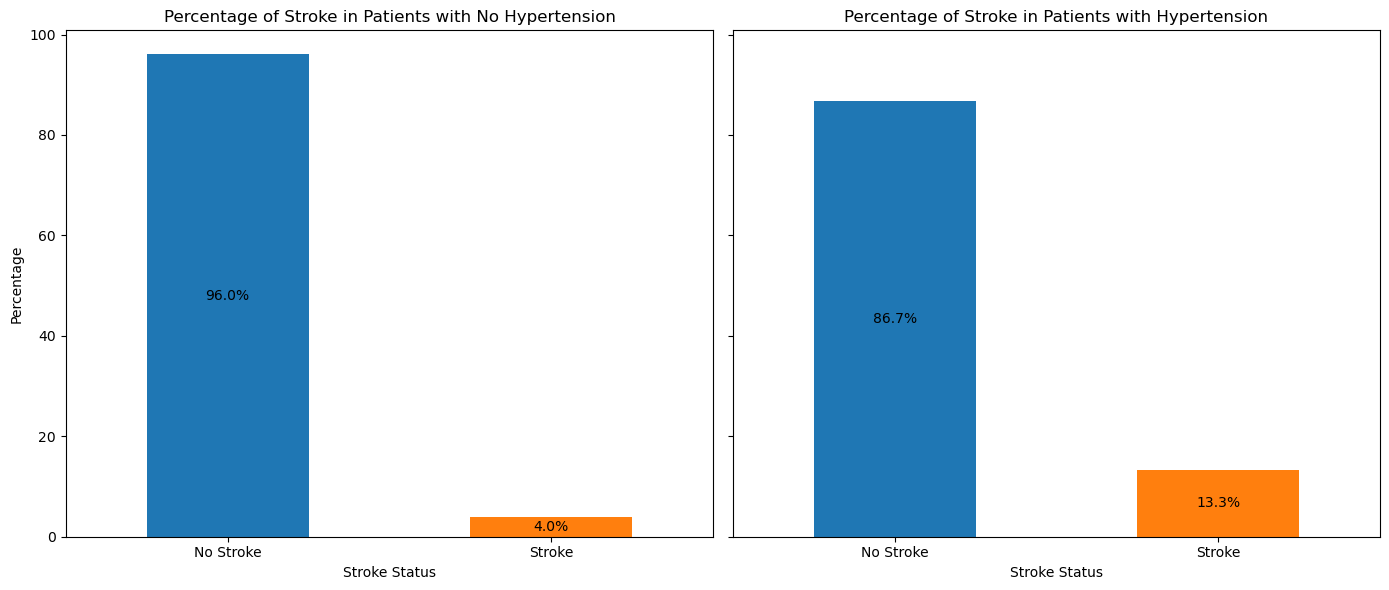

In [159]:
grouped = stroke_data.groupby('hypertension')['stroke'].value_counts(normalize=True).unstack() * 100

grouped = grouped.fillna(0)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

titles = ['No Hypertension', 'Hypertension']

for i, ax in enumerate(axes):

    grouped_plot = grouped.loc[i].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)
    ax.set_title(f'Percentage of Stroke in Patients with {titles[i]}')
    ax.set_xlabel('Stroke Status')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(['No Stroke', 'Stroke'], rotation=0)

    for p in grouped_plot.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        if height > 0:  
            ax.text(x + width/2, 
                    y + height/2, 
                    f'{height:.1f}%', 
                    horizontalalignment='center', 
                    verticalalignment='center')

plt.tight_layout()
plt.show()

**Heart Disease**

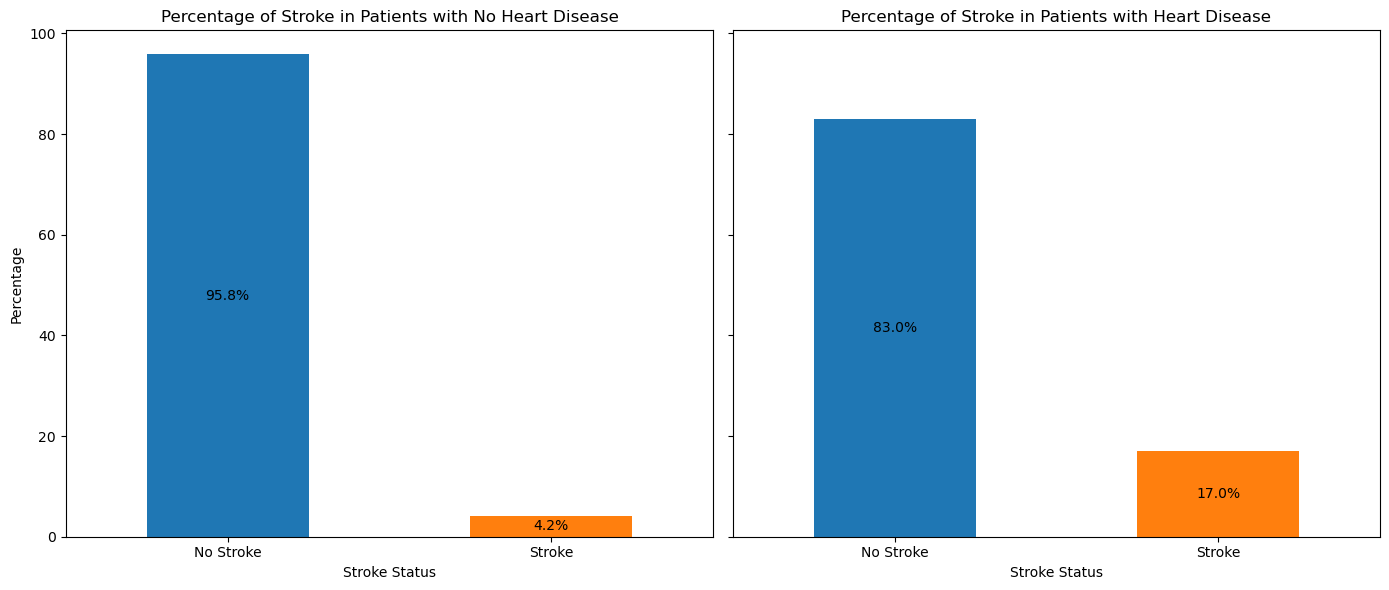

In [160]:
grouped_heart_disease = stroke_data.groupby('heart_disease')['stroke'].value_counts(normalize=True).unstack() * 100
grouped_heart_disease = grouped_heart_disease.fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

titles_heart_disease = ['No Heart Disease', 'Heart Disease']

for i, ax in enumerate(axes):
    grouped_plot = grouped_heart_disease.iloc[i].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)
    ax.set_title(f'Percentage of Stroke in Patients with {titles_heart_disease[i]}')
    ax.set_xlabel('Stroke Status')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(['No Stroke', 'Stroke'], rotation=0)

    for p in grouped_plot.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:  
            ax.text(x + width / 2,
                    y + height / 2,
                    f'{height:.1f}%',
                    horizontalalignment='center',
                    verticalalignment='center')

plt.tight_layout()
plt.show()


**Smoking Status**

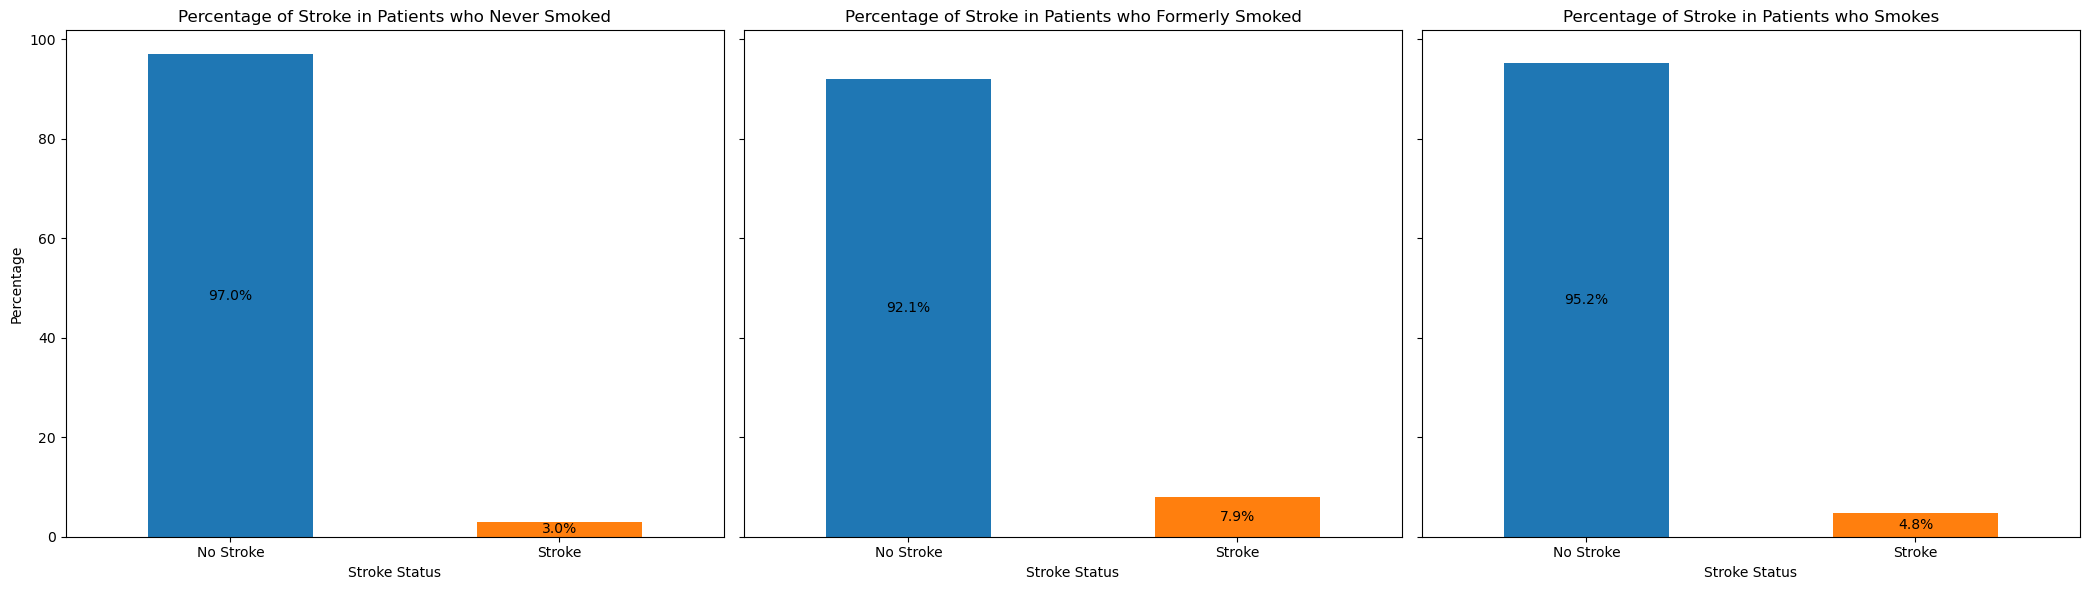

In [161]:
grouped_smoking_status = stroke_data.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack() * 100
grouped_smoking_status = grouped_smoking_status.fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6), sharey=True)

titles_smoking_status = ['Never Smoked', 'Formerly Smoked', 'Smokes']

for i, ax in enumerate(axes):
    grouped_plot = grouped_smoking_status.iloc[i].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)
    ax.set_title(f'Percentage of Stroke in Patients who {titles_smoking_status[i]}')
    ax.set_xlabel('Stroke Status')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(['No Stroke', 'Stroke'], rotation=0)

    for p in grouped_plot.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0: 
            ax.text(x + width / 2,
                    y + height / 2,
                    f'{height:.1f}%',
                    horizontalalignment='center',
                    verticalalignment='center')

plt.tight_layout()
plt.show()


**Residence Type**

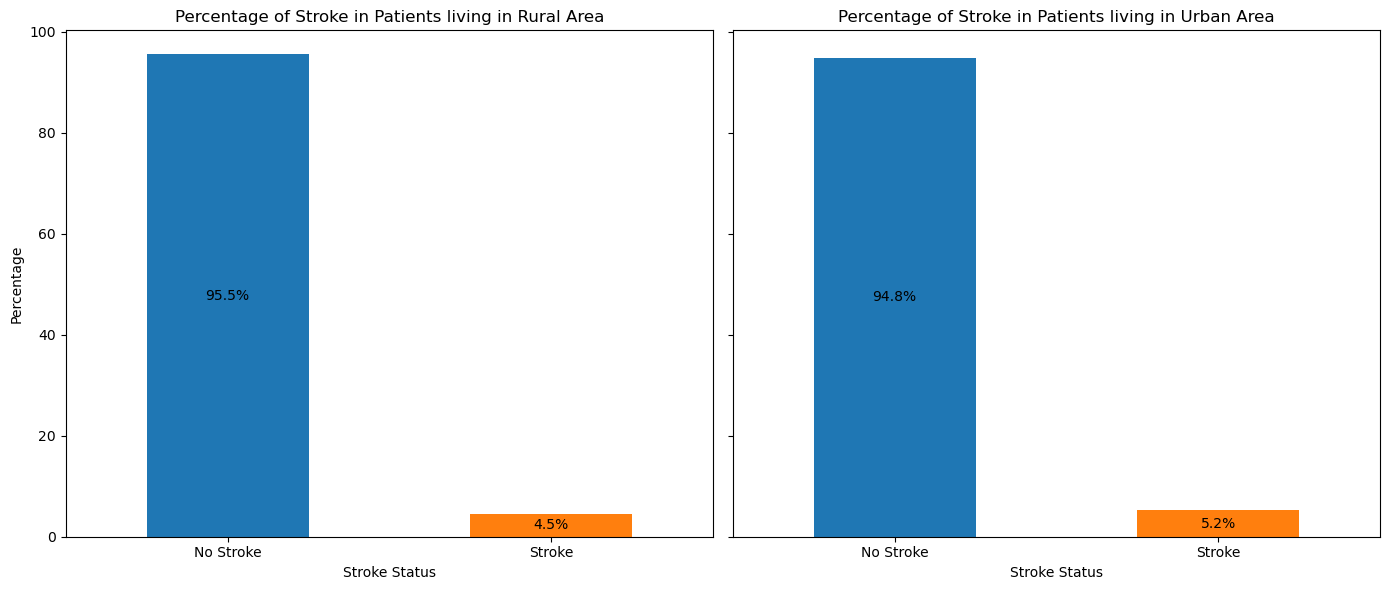

In [162]:
grouped_residence_type = stroke_data.groupby('Residence_type')['stroke'].value_counts(normalize=True).unstack() * 100
grouped_residence_type = grouped_residence_type.fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

titles_residence_type = ['Rural', 'Urban']

for i, ax in enumerate(axes):
    grouped_plot = grouped_residence_type.iloc[i].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)
    ax.set_title(f'Percentage of Stroke in Patients living in {titles_residence_type[i]} Area')
    ax.set_xlabel('Stroke Status')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(['No Stroke', 'Stroke'], rotation=0)

    for p in grouped_plot.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:  
            ax.text(x + width / 2,
                    y + height / 2,
                    f'{height:.1f}%',
                    horizontalalignment='center',
                    verticalalignment='center')

plt.tight_layout()
plt.show()


**Work Type**

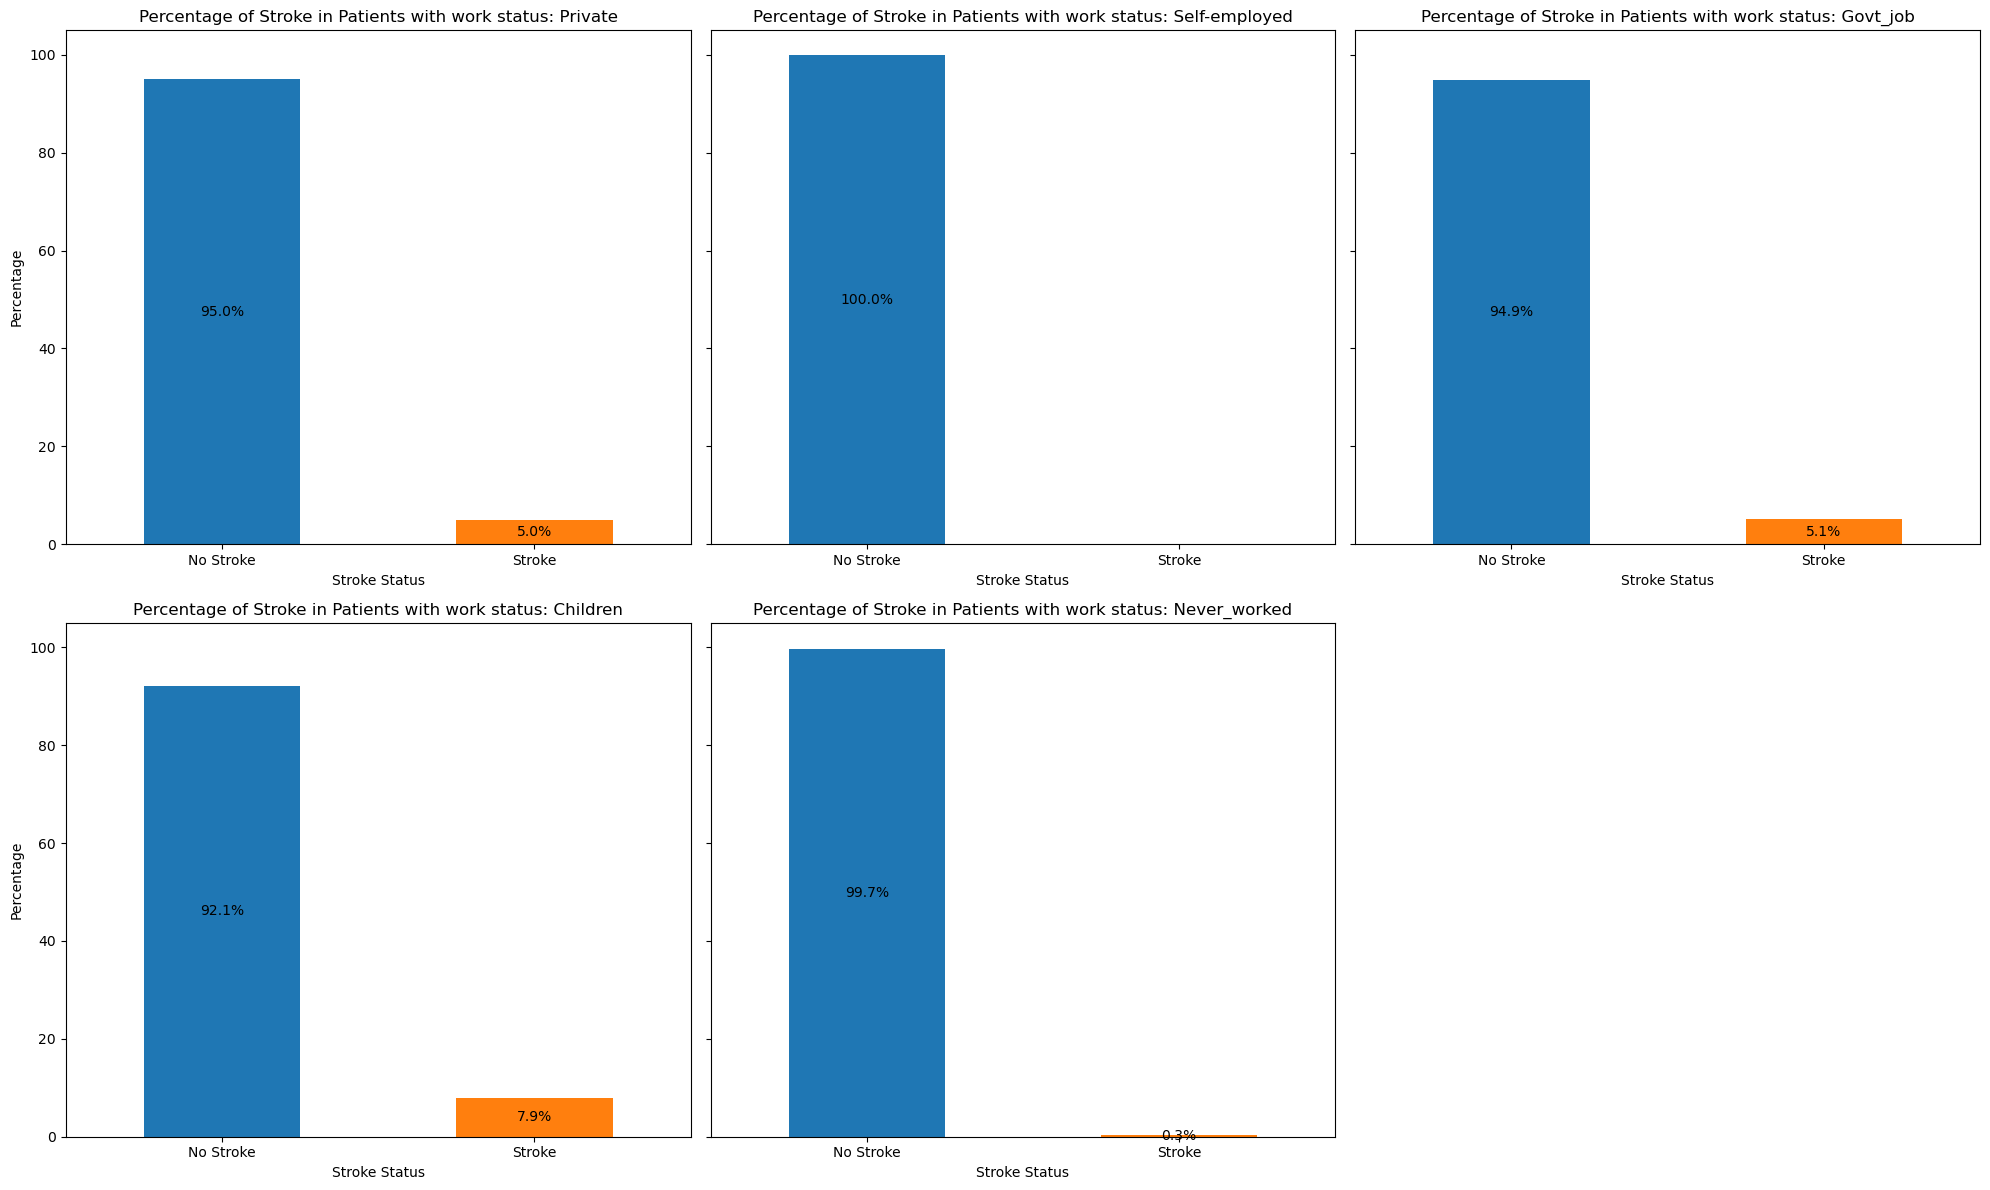

In [163]:
grouped_work_type = stroke_data.groupby('work_type')['stroke'].value_counts(normalize=True).unstack() * 100
grouped_work_type = grouped_work_type.fillna(0)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), sharey=True)

titles_work_type = ['Private', 'Self-employed', 'Govt_job', 'Children', 'Never_worked']

for i, ax in enumerate(axes.flatten()):
    if i < len(titles_work_type):
        grouped_plot = grouped_work_type.iloc[i].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)
        ax.set_title(f'Percentage of Stroke in Patients with work status: {titles_work_type[i]}')
        ax.set_xlabel('Stroke Status')
        ax.set_ylabel('Percentage')
        ax.set_xticklabels(['No Stroke', 'Stroke'], rotation=0)

        for p in grouped_plot.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            if height > 0:  
                ax.text(x + width / 2,
                        y + height / 2,
                        f'{height:.1f}%',
                        horizontalalignment='center',
                        verticalalignment='center')
    else:
        ax.set_visible(False) 

plt.tight_layout()
plt.show()


**Marital Satatus**

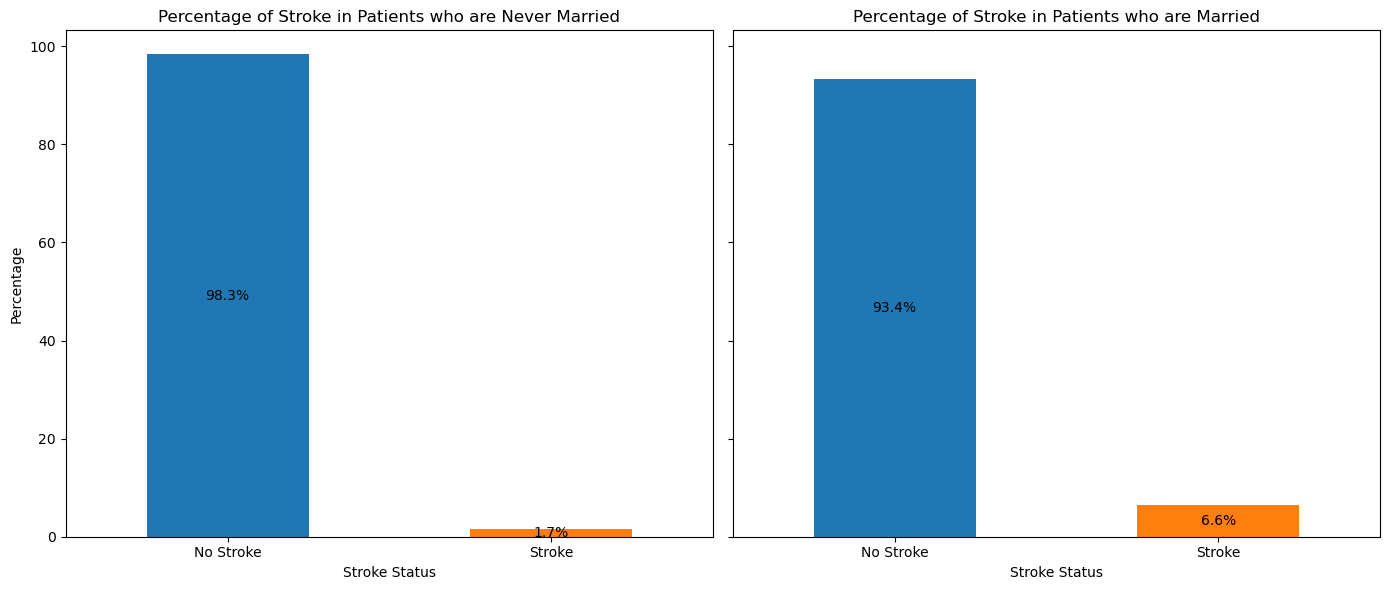

In [164]:
grouped_ever_married = stroke_data.groupby('ever_married')['stroke'].value_counts(normalize=True).unstack() * 100
grouped_ever_married = grouped_ever_married.fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

titles_ever_married = ['Never Married', 'Married']

for i, ax in enumerate(axes):
    grouped_plot = grouped_ever_married.iloc[i].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)
    ax.set_title(f'Percentage of Stroke in Patients who are {titles_ever_married[i]}')
    ax.set_xlabel('Stroke Status')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(['No Stroke', 'Stroke'], rotation=0)

    for p in grouped_plot.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:  # Only add labels to non-zero stacks
            ax.text(x + width / 2,
                    y + height / 2,
                    f'{height:.1f}%',
                    horizontalalignment='center',
                    verticalalignment='center')

plt.tight_layout()
plt.show()


### b) How do different factors interact to influence the risk of stroke in a population?

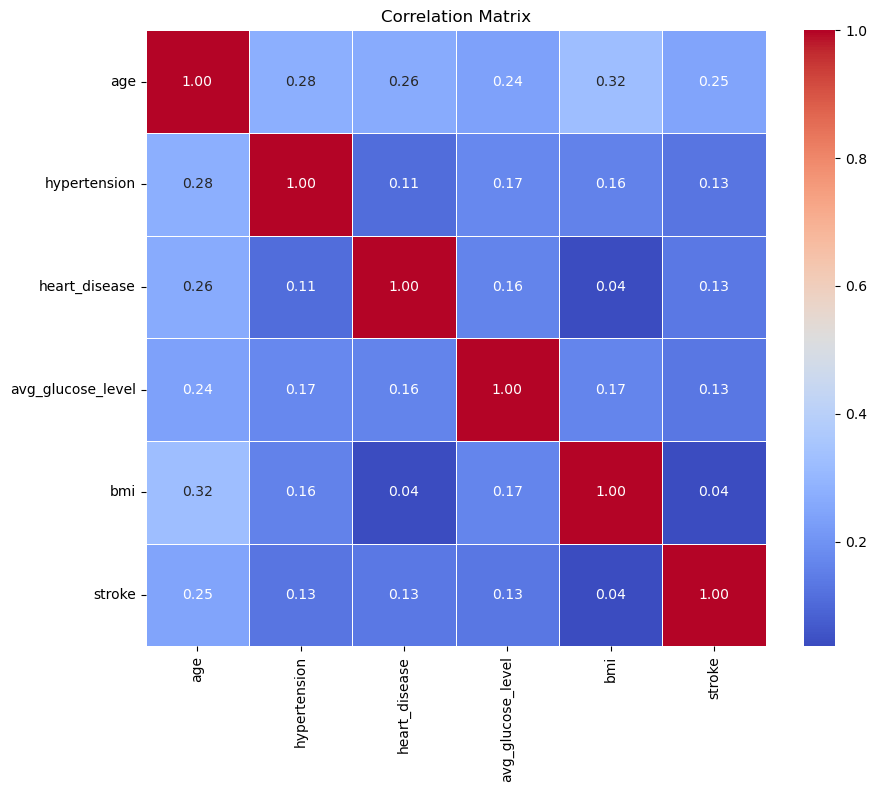

In [165]:
# Calculating the correlation matrix
correlation_matrix = stroke_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


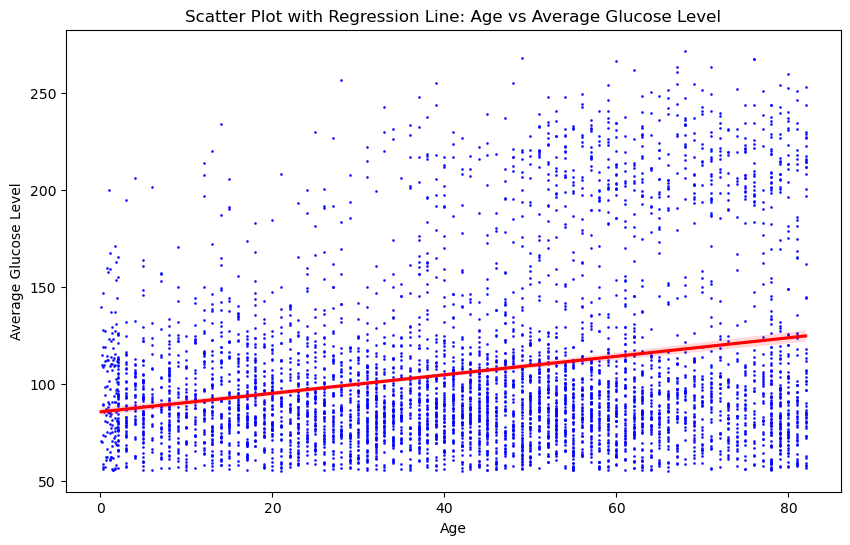

In [166]:
# Creating scatter plot with a regression line for Age vs. Average Glucose Level
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='avg_glucose_level', data=stroke_data, color='blue', line_kws={'color': 'red'}, scatter_kws={'s': 1})
plt.title('Scatter Plot with Regression Line: Age vs Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

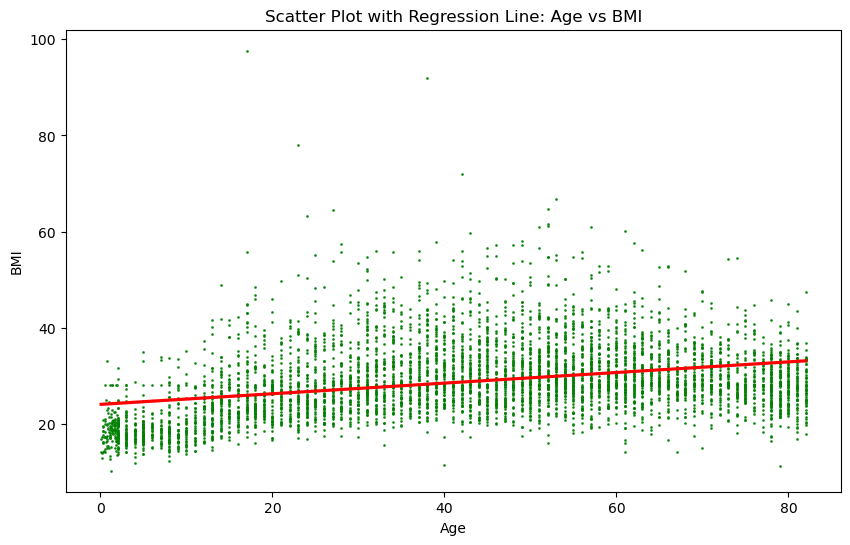

In [167]:
# Creating scatter plot with a regression line for Age vs. BMI
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='bmi', data=stroke_data, color='green', line_kws={'color': 'red'}, scatter_kws={'s': 1})
plt.title('Scatter Plot with Regression Line: Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

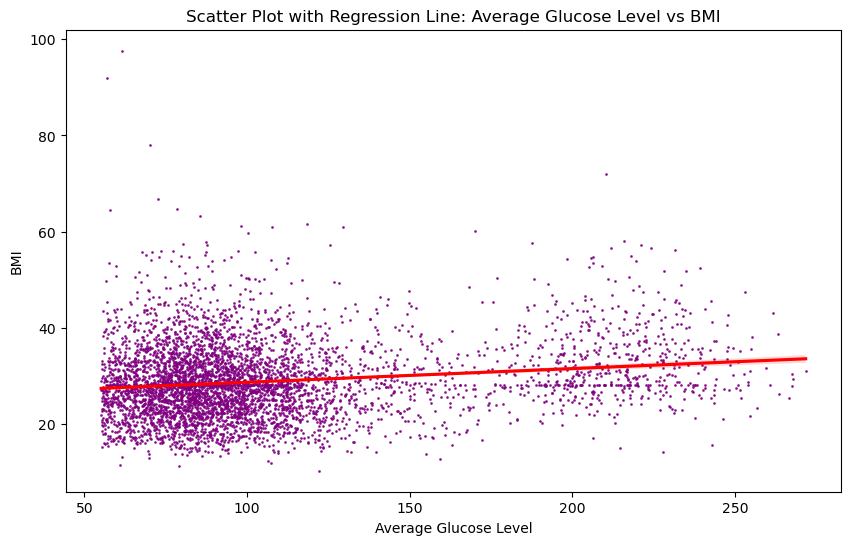

In [168]:
# Additional plot for Average Glucose Level vs. BMI
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_glucose_level', y='bmi', data=stroke_data, color='purple', line_kws={'color': 'red'}, scatter_kws={'s': 1})
plt.title('Scatter Plot with Regression Line: Average Glucose Level vs BMI')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.show()

In [169]:
from scipy.stats import chi2_contingency, ttest_ind

# Function to perform chi-square test
def perform_chi_square_test(data, variable):
    contingency_table = pd.crosstab(data[variable], data['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {variable}: Chi2 = {chi2:.2f}, p-value = {p:.4f}")

# Conducting chi-square tests for categorical variables
categorical_variables = ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for variable in categorical_variables:
    perform_chi_square_test(stroke_data, variable)

Chi-square test for hypertension: Chi2 = 81.57, p-value = 0.0000
Chi-square test for heart_disease: Chi2 = 90.23, p-value = 0.0000
Chi-square test for ever_married: Chi2 = 58.87, p-value = 0.0000
Chi-square test for work_type: Chi2 = 49.16, p-value = 0.0000
Chi-square test for Residence_type: Chi2 = 1.07, p-value = 0.2998
Chi-square test for smoking_status: Chi2 = 29.23, p-value = 0.0000


Hypertension: With a Chi-square statistic of 81.57 and a p-value of 0.0000, there is a statistically significant association between hypertension and stroke. Patients with hypertension are more likely to have had a stroke.

Heart Disease: Similar to hypertension, the high Chi-square statistic of 90.23 and a p-value of 0.0000 strongly suggest that heart disease is associated with an increased risk of stroke.

Ever Married: A Chi-square statistic of 58.87 and a p-value of 0.0000 indicate a significant association between marital status and stroke occurrence. This could reflect underlying factors related to lifestyle or social support.

Work Type: With a Chi-square statistic of 49.16 and a p-value of 0.0000, the type of work individuals engage in is significantly associated with stroke risk. This could be linked to stress levels, physical activity, and other job-related factors.

Residence Type: The Chi-square statistic of 1.07 with a p-value of 0.2998 suggests no significant association between the type of residence (urban or rural) and the occurrence of stroke.

Smoking Status: A Chi-square statistic of 29.23 and a p-value of 0.0000 indicate a significant association between smoking status and stroke, highlighting smoking as a risk factor.

### c) Does higher mean age, BMI, and glucose level correlate with an increased risk of stroke compared to individuals with lower values in these parameters?

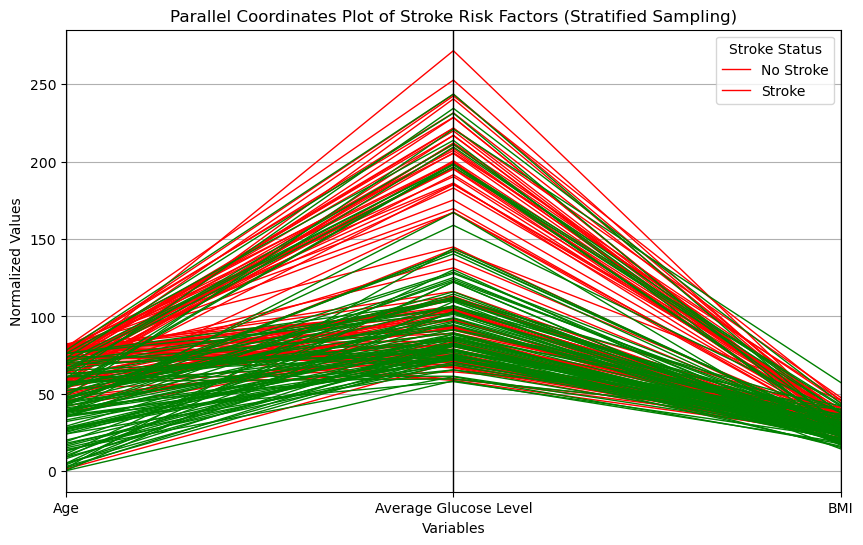

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates

# Sample data for the plot
sampled_data = pd.concat([
    stroke_data[stroke_data['stroke'] == 1].sample(n=100, random_state=42),
    stroke_data[stroke_data['stroke'] == 0].sample(n=100, random_state=42)
])

columns_to_plot = ['age', 'avg_glucose_level', 'bmi']

# Copying relevant columns for normalization
normalized_data = sampled_data[columns_to_plot].copy()

# Add the stroke column to the normalized data
normalized_data['stroke'] = sampled_data['stroke']

# Renaming columns for better readability in the plot
new_column_names = {
    'age': 'Age',
    'avg_glucose_level': 'Average Glucose Level',
    'bmi': 'BMI'
}
normalized_data.rename(columns=new_column_names, inplace=True)

# Create the parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(normalized_data, 'stroke', color=['red', 'green'], linewidth=1)
plt.title('Parallel Coordinates Plot of Stroke Risk Factors (Stratified Sampling)')
plt.xlabel('Variables')
plt.ylabel('Normalized Values')
plt.legend(['No Stroke', 'Stroke'], loc='upper right', title='Stroke Status')
plt.grid(True)
plt.show()


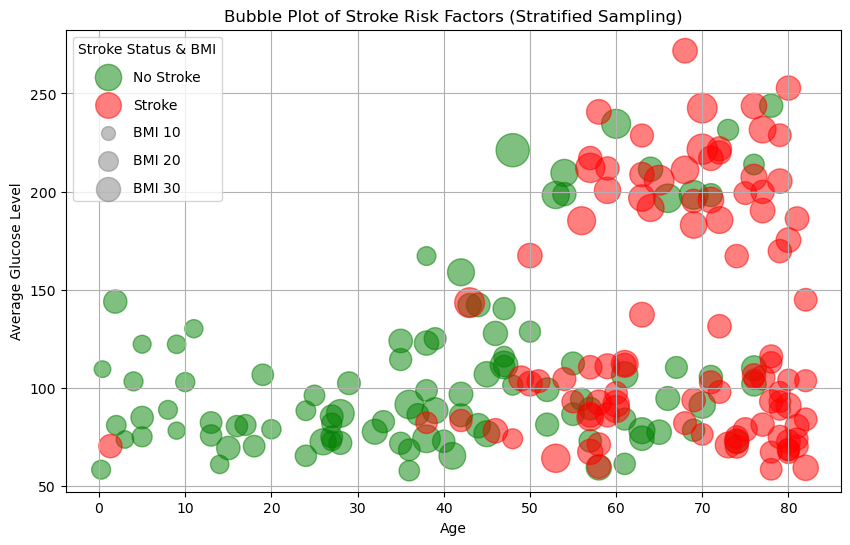

In [171]:
import matplotlib.pyplot as plt
import pandas as pd

colors = {0: 'green', 1: 'red'}

plt.figure(figsize=(10, 6))
for stroke_status, group in sampled_data.groupby('stroke'):
    plt.scatter(group['age'], group['avg_glucose_level'], s=group['bmi']*10, alpha=0.5, c=colors[stroke_status], label='Stroke' if stroke_status == 1 else 'No Stroke')

plt.title('Bubble Plot of Stroke Risk Factors (Stratified Sampling)')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend(loc='upper left')  

sizes = [10, 20, 30]  
for size in sizes:
    plt.scatter([], [], s=size*10, c='gray', alpha=0.5, label=f'BMI {size}')  # Use actual BMI values

plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Stroke Status & BMI')
plt.grid(True)
plt.show()


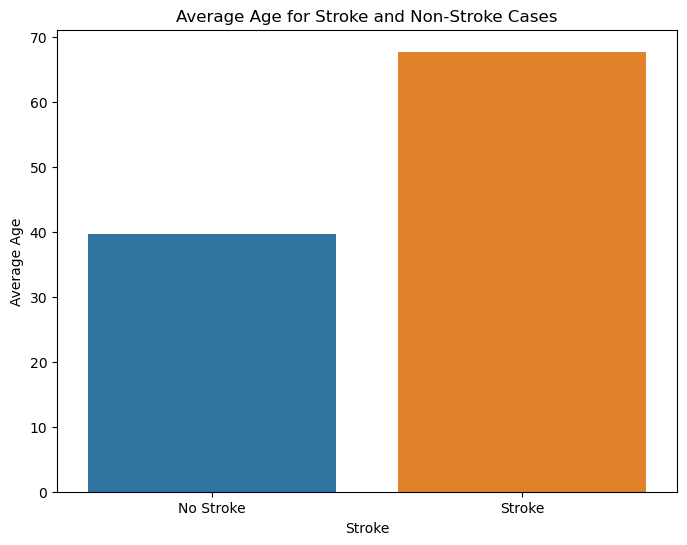

In [172]:
mean_data = normalized_data.groupby('stroke').mean()

plt.figure(figsize=(8, 6))
sns.barplot(data=mean_data, x=mean_data.index, y='Age')
plt.title('Average Age for Stroke and Non-Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Average Age')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()


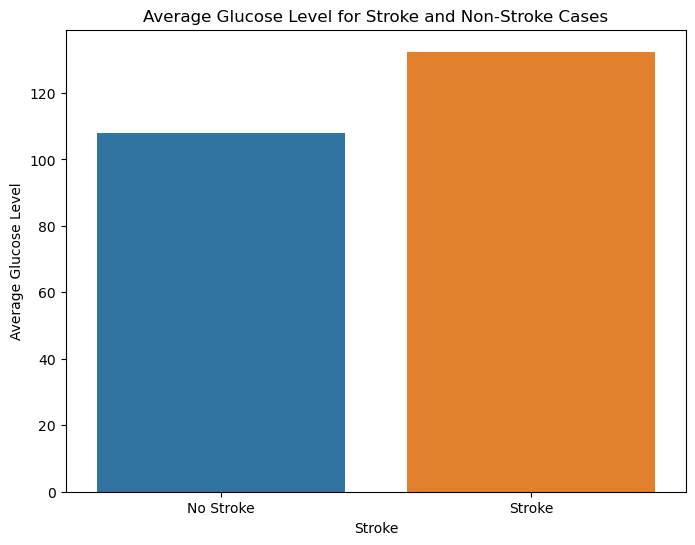

In [173]:
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_data, x=mean_data.index, y='Average Glucose Level')
plt.title('Average Glucose Level for Stroke and Non-Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()


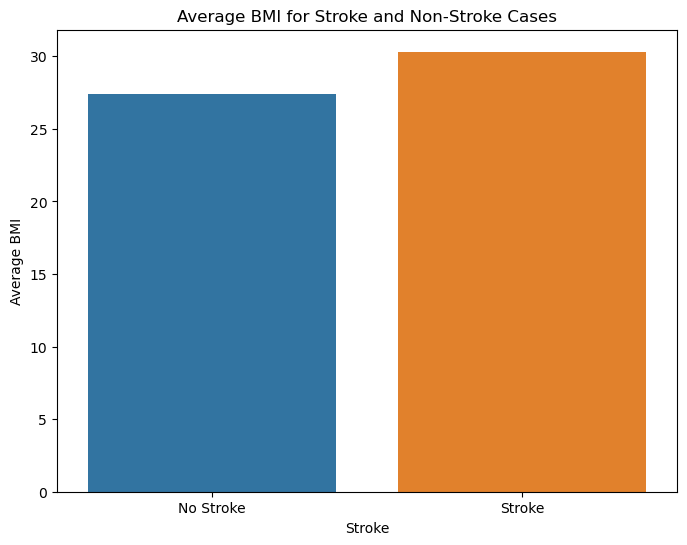

In [174]:
# Bar plot for bmi
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_data, x=mean_data.index, y='BMI')
plt.title('Average BMI for Stroke and Non-Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Average BMI')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

In [175]:
from scipy.stats import ttest_ind

t_statistic_age, p_value_age = ttest_ind(stroke_data[stroke_data['stroke'] == 1]['age'],
                                          stroke_data[stroke_data['stroke'] == 0]['age'],
                                          alternative='greater')

print("Age:")
print("t-statistic:", t_statistic_age)
print("p-value:", p_value_age)

t_statistic_glucose, p_value_glucose = ttest_ind(stroke_data[stroke_data['stroke'] == 1]['avg_glucose_level'],
                                                  stroke_data[stroke_data['stroke'] == 0]['avg_glucose_level'],
                                                  alternative='greater')

print("\nAvg Glucose Level:")
print("t-statistic:", t_statistic_glucose)
print("p-value:", p_value_glucose)

t_statistic_bmi, p_value_bmi = ttest_ind(stroke_data[stroke_data['stroke'] == 1]['bmi'],
                                          stroke_data[stroke_data['stroke'] == 0]['bmi'],
                                          alternative='greater')

print("\nBMI:")
print("t-statistic:", t_statistic_bmi)
print("p-value:", p_value_bmi)


Age:
t-statistic: 18.07760628336985
p-value: 3.717734411319831e-71

Avg Glucose Level:
t-statistic: 9.515777715338581
p-value: 1.3526513485836504e-21

BMI:
t-statistic: 2.579749002737211
p-value: 0.004957453452876521


###  d) Based on the previous visual and statistical analyses, how do the different factors affect the chance of having a stroke, and how can these be visually represented to aid understanding?

In [176]:
data = stroke_data.copy()
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})


X_numerical = data[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'gender']]
y_numerical = data['stroke']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_numerical)

X_sm_scaled = sm.add_constant(X_scaled)

X_sm_scaled_train, X_sm_scaled_test, y_sm_train, y_sm_test = train_test_split(X_sm_scaled, y_numerical, test_size=0.5, random_state=0)

logit_model_scaled = sm.Logit(y_sm_train, X_sm_scaled_train).fit()

logit_model_scaled.summary()

Optimization terminated successfully.
         Current function value: 0.154170
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 2554
Model:                          Logit   Df Residuals:                     2547
Method:                           MLE   Df Model:                            6
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.2202
Time:                        21:30:52   Log-Likelihood:                -393.75
converged:                       True   LL-Null:                       -504.94
Covariance Type:            nonrobust   LLR p-value:                 3.219e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1493      0.208    -19.941      0.000      -4.557      -3.741
x1             1.7234      0.176      9.813      0.000       1.379       2.068
x2             0.1177      0.078      1.499      0.134      -0.036       0.271
x3             0.0153      0.124      0.123      0.902      -0.228       0.259
x4             0.0144      0.073      0.197      0.844      -0.128       0.157
x5             0.1680      0.056      3.009      0.003       0.059       0.277
x6             0.0123      0.098      0.126      0.899      -0.179       0.204
==============================================================================
"""

### Interpretation of Logistic Regression Coefficients

#### Constant (const)
- **Coefficient**: -4.1493
- **Interpretation**: The baseline log-odds of having a stroke are very low when all predictors are zero.

#### Age (x1)
- **Coefficient**: 1.7234
- **Interpretation**: Older age significantly increases the log-odds of having a stroke.

#### Average Glucose Level (x2)
- **Coefficient**: 0.1177
- **Interpretation**: Higher glucose levels slightly increase the log-odds of having a stroke.

#### Body Mass Index (BMI) (x3)
- **Coefficient**: 0.0153
- **Interpretation**: Higher BMI has a minimal effect on the log-odds of having a stroke.

#### Hypertension (x4)
- **Coefficient**: 0.0144
- **Interpretation**: Having hypertension slightly increases the log-odds of having a stroke.

#### Heart Disease (x5)
- **Coefficient**: 0.1680
- **Interpretation**: Having heart disease increases the log-odds of having a stroke.

#### Gender (x6)
- **Coefficient**: 0.0123
- **Interpretation**: Being male has a minimal effect on the log-odds of having a stroke.


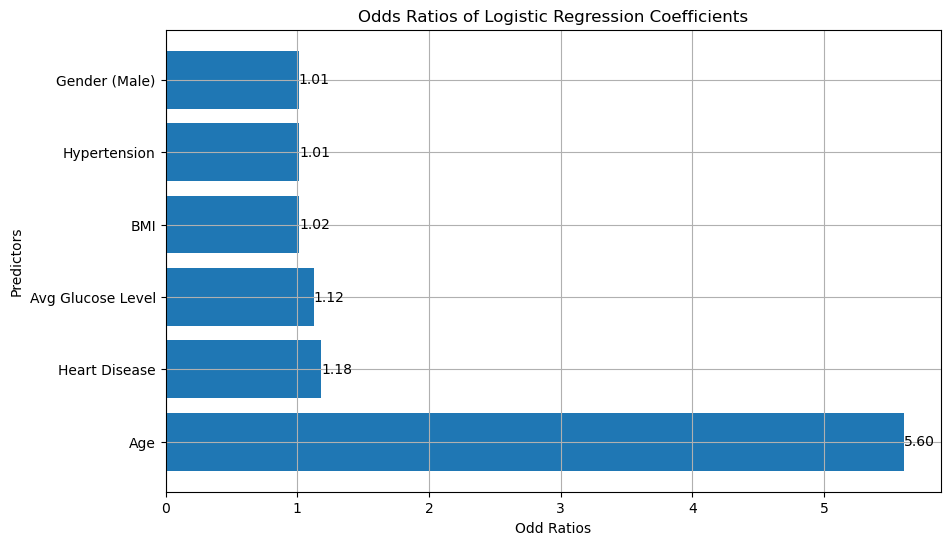

In [177]:
import matplotlib.pyplot as plt
import numpy as np

coef = logit_model_scaled.params[1:]  
odds_ratios = np.exp(coef)  
sorted_indices = np.argsort(np.abs(odds_ratios))[::-1]  
sorted_odds_ratios = odds_ratios[sorted_indices]
labels = ['Age', 'Heart Disease', 'Avg Glucose Level', 'BMI', 'Hypertension', 'Gender (Male)']

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, sorted_odds_ratios)
plt.xlabel('Odd Ratios')
plt.ylabel('Predictors')
plt.title('Odds Ratios of Logistic Regression Coefficients')
plt.xticks()
plt.grid(True)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', 
             va='center')

plt.show()


**Key Findings:**
- **Age** has the highest odds ratio (5.60), indicating that older age significantly increases the likelihood of having a stroke.
- **Heart Disease** (1.18) and **Average Glucose Level** (1.12) also show notable increases in stroke likelihood.
- **BMI** (1.02), **Hypertension** (1.01), and **Gender (Male)** (1.01) have minimal impact on the likelihood of having a stroke.

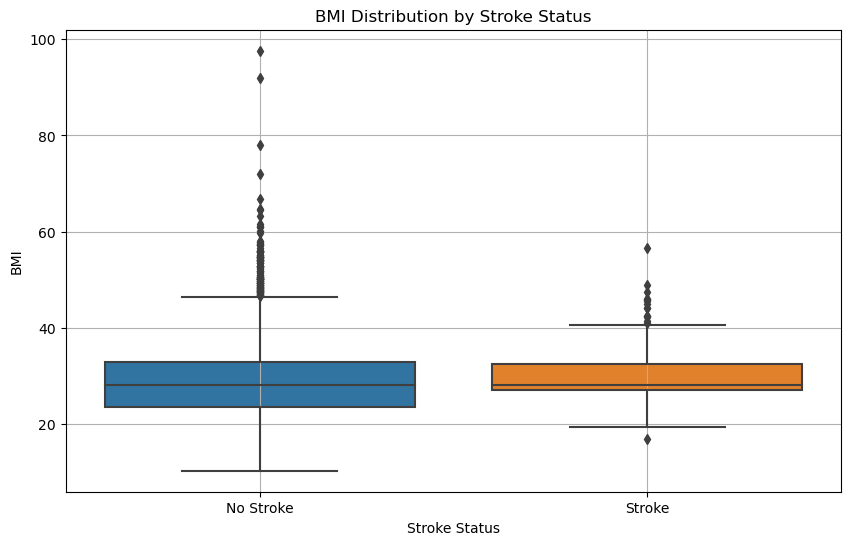

In [178]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='bmi', data=stroke_data)
plt.title('BMI Distribution by Stroke Status')
plt.xlabel('Stroke Status')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])  
plt.grid(True)  
plt.show()

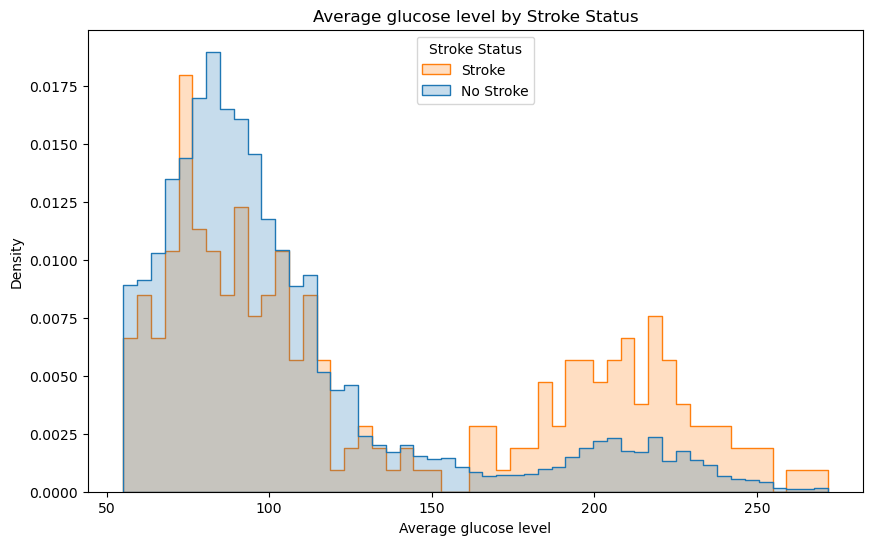

In [179]:
plt.figure(figsize=(10, 6))
sns.histplot(data=stroke_data, x='avg_glucose_level', hue='stroke', element='step', stat='density', common_norm=False)
plt.title('Average glucose level by Stroke Status')
plt.xlabel('Average glucose level')
plt.ylabel('Density')
plt.legend(title='Stroke Status', labels=['Stroke', 'No Stroke'], loc='upper center')
plt.show()

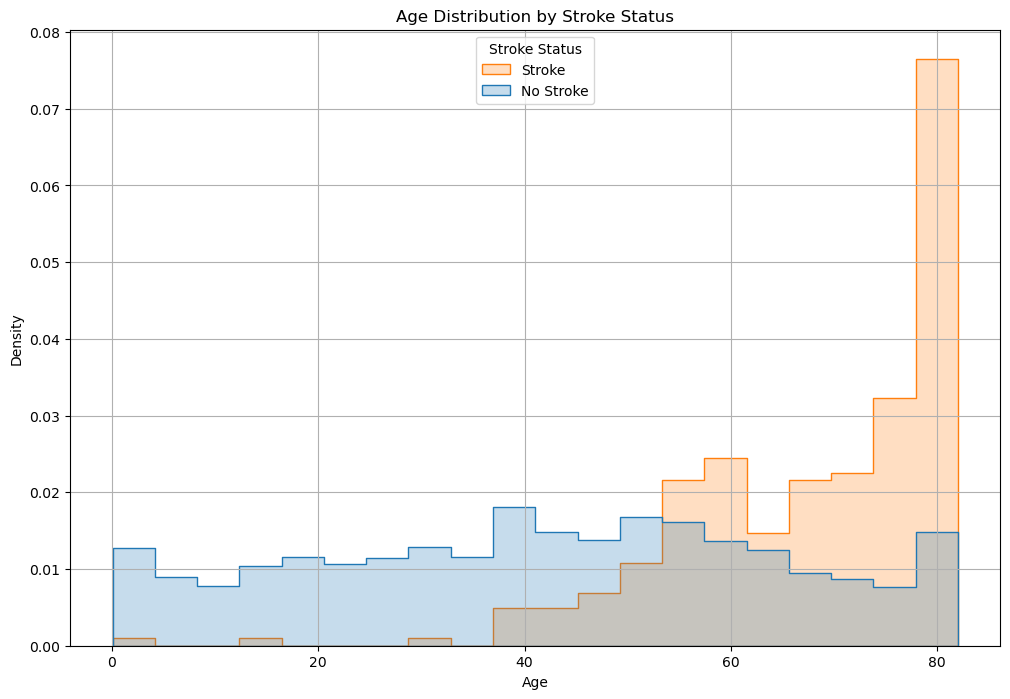

In [180]:
data = stroke_data

plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='age', hue='stroke', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Stroke Status', labels=['Stroke', 'No Stroke'], loc='upper center')
plt.grid(True)  
plt.show()